In [52]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency 

In [2]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\Arun kumar Biyyala\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.columns.unique()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
df.shape

(300698, 53)

In [6]:
#df[Created_time]=df['Created Date'].apply(lambda x:x.time)

In [7]:
df['Complaint Type'].value_counts().head(10)

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

In [8]:
df.isnull().sum().sort_values(ascending=False)

School or Citywide Complaint      300698
Vehicle Type                      300698
Taxi Company Borough              300698
Taxi Pick Up Location             300698
Garage Lot Name                   300698
Ferry Direction                   300697
Ferry Terminal Name               300696
Road Ramp                         300485
Bridge Highway Segment            300485
Bridge Highway Name               300455
Bridge Highway Direction          300455
Landmark                          300349
Intersection Street 2             257336
Intersection Street 1             256840
Cross Street 2                     49779
Cross Street 1                     49279
Street Name                        44410
Incident Address                   44410
Descriptor                          5914
X Coordinate (State Plane)          3540
Latitude                            3540
Longitude                           3540
Y Coordinate (State Plane)          3540
Location                            3540
Address Type    

In [9]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [10]:
import matplotlib.pyplot as plt
mylabels=['Blocked Driveway','Illegal Parking','Noise - Street/Sidewalk','Noise - Commercial','Derelict Vehicle',           
'Noise - Vehicle',            
'Animal Abuse',                
'Traffic',                     
'Homeless Encampment',         
'Noise - Park']
myexplode=[0.2,0.1,0.05,0,0,0,0,0,0,0]

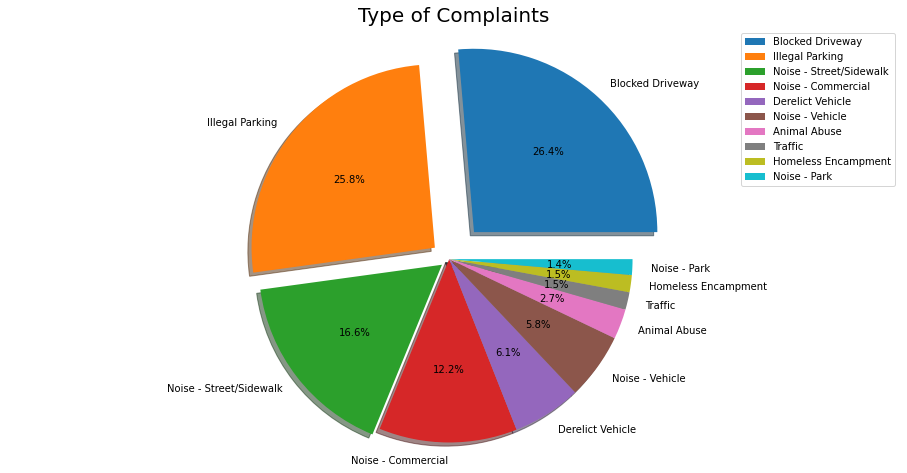

In [11]:
plt.figure(figsize=(16,8))
plt.pie(df['Complaint Type'].value_counts().head(10),labels=mylabels,explode=myexplode,shadow=True,autopct='%1.1f%%')
plt.title('Type of Complaints',size=20)
plt.legend(mylabels)
plt.axis('equal')
plt.show()

In [12]:
#import datetime as dt
#df['Request_close_time']=df['Closed Date']-df['Created Date']

In [13]:
df['Created Date']=pd.to_datetime(df['Created Date'])
df['Closed Date']=pd.to_datetime(df['Closed Date'])

In [14]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [15]:
df['Request_close_time']=df['Closed Date']-df['Created Date']

In [16]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_close_time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [17]:
Request_Close_Time=[]
for x in df['Closed Date']-df['Created Date']:
    close=x.total_seconds()/60
    Request_Close_Time.append(close)
    
df['Request_Close_Time']=Request_Close_Time
    

In [18]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_close_time,Request_Close_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,207.033333


In [19]:
K=round((df['Request_Close_Time']<100).sum()/len(df)*100,2)

In [20]:
print('percentage of requests solved within less than 100 hours',round((df['Request_Close_Time']<100).sum()/len(df)*100,2))

percentage of requests solved within less than 100 hours 32.47


In [21]:
print('percentage of requests solved within less than 1000 hours',round((df['Request_Close_Time']<1000).sum()/len(df)*100,2))

percentage of requests solved within less than 1000 hours 96.47


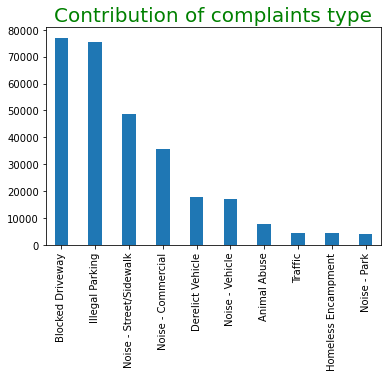

In [22]:
#plt.figure(figsize=(15,9))
df['Complaint Type'].value_counts()[:10].plot(kind='bar',alpha=1,width=0.4)
plt.title('Contribution of complaints type',size=20,color='g')
plt.show()

In [23]:
import seaborn as sns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

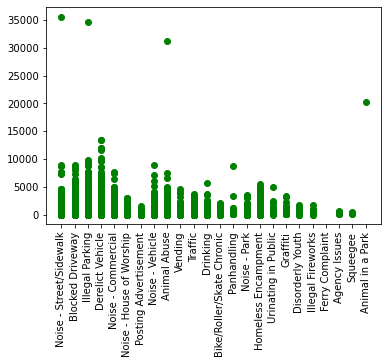

In [24]:
#plt.figure(figsize=(15,9))
plt.scatter(x=df['Complaint Type'],y=df['Request_Close_Time'],c='green')
plt.xticks(rotation=90)

In [25]:
df['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [26]:
k=round((df['Status']=='Closed').sum()/len(df)*100,2)

In [27]:
k

99.26

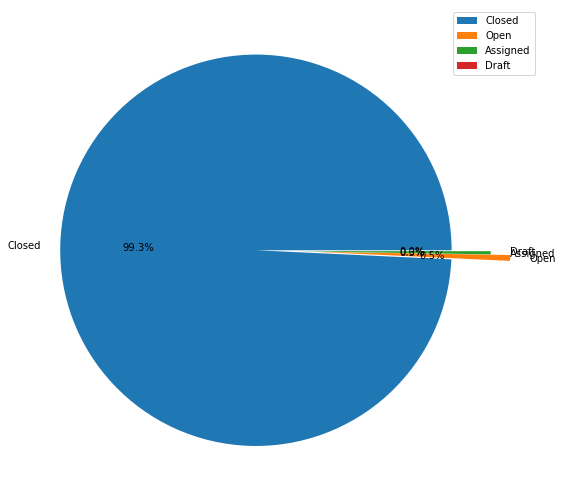

In [28]:
My_Labels=['Closed','Open','Assigned','Draft']
explode=(0.2,0.1,0,0)
plt.figure(figsize=(15,9))
plt.pie(df['Status'].value_counts(),labels=My_Labels, explode=explode,autopct='%1.1f%%')
plt.legend(My_Labels)

<AxesSubplot:>

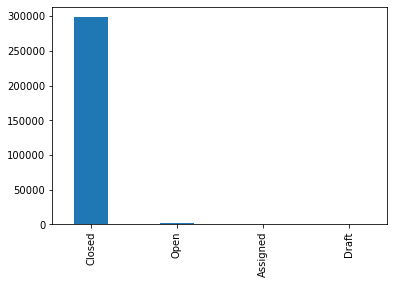

In [29]:
df['Status'].value_counts().plot(kind='bar',alpha=1,width=0.4)

In [30]:
df['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

([<matplotlib.patches.Wedge at 0x293041b2b50>,
 [Text(0.5690531003951977, 0.9413705800218175, 'BROOKLYN'),
  Text(-1.0671711219923388, 0.2667316936279098, 'QUEENS'),
  Text(-0.30641780150301257, -1.056460188990603, 'MANHATTAN'),
  Text(0.8145835820173102, -0.7392249913983213, 'BRONX'),
  Text(1.0816843321684868, -0.19989748758104664, 'STATEN ISLAND'),
  Text(1.099602260156741, -0.029578192273815113, 'Unspecified')],
 [Text(0.31039260021556236, 0.5134748618300823, '32.7%'),
  Text(-0.5820933392685483, 0.1454900147061326, '26.8%'),
  Text(-0.16713698263800683, -0.5762510121766925, '22.0%'),
  Text(0.4443183174639873, -0.40321363167181157, '13.5%'),
  Text(0.5900096357282655, -0.10903499322602543, '4.1%'),
  Text(0.599783050994586, -0.01613355942208097, '0.9%')])

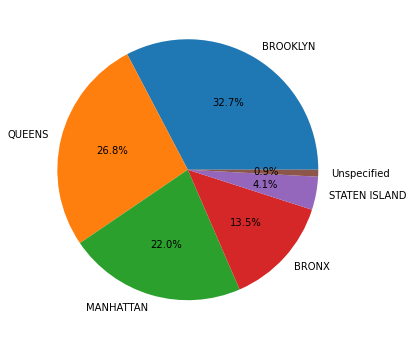

In [31]:
labels=['BROOKLYN','QUEENS','MANHATTAN','BRONX','STATEN ISLAND','Unspecified']
plt.figure(figsize=(9,6))
plt.pie(df['Borough'].value_counts(),labels=labels,autopct='%1.1f%%')
#plt.legend(labels)

In [32]:
pd.DataFrame(df.groupby('Location Type')['Request_Close_Time'].mean().sort_values(ascending=True))

,Request_Close_Time
Location Type,
Subway Station,142.250980
Club/Bar/Restaurant,186.074330
House of Worship,191.833279
Store/Commercial,198.089073
Park/Playground,207.137129
Highway,223.424221
Bridge,229.158333
Roadway Tunnel,266.525714
Street/Sidewalk,268.515306


In [33]:
pd.DataFrame(df.groupby('City')['Request_Close_Time'].mean().sort_values(ascending=False))

,Request_Close_Time
City,
QUEENS,815.586458
FLORAL PARK,703.171272
QUEENS VILLAGE,654.411273
BELLEROSE,633.386578
CAMBRIA HEIGHTS,607.426555
ROSEDALE,601.867552
SPRINGFIELD GARDENS,551.145130
GLEN OAKS,528.943900
NEW HYDE PARK,453.365646


In [34]:
df.shape[0],df.shape[1]

(300698, 55)

In [35]:
pd.DataFrame((df.isna().sum()/df.shape[0]*100).sort_values(ascending=False))

,0
School or Citywide Complaint,100.000000
Vehicle Type,100.000000
Garage Lot Name,100.000000
Taxi Company Borough,100.000000
Taxi Pick Up Location,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Direction,99.919188


In [36]:
new_df=df.loc[:,df.isna().sum()/df.shape[0]*100<=50]

In [37]:
new_df.shape

(300698, 41)

In [38]:
new_df.columns.tolist()

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Address Type',
 'City',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'Latitude',
 'Longitude',
 'Location',
 'Request_close_time',
 'Request_Close_Time']

In [39]:
rem=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:
        print(x+ " "*10+" : ",new_df[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


In [40]:
new_df['Agency'].unique()

array(['NYPD'], dtype=object)

In [41]:
rem

['Agency',
 'Agency Name',
 'Facility Type',
 'Park Facility Name',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found']

In [44]:
new_df.drop(rem,axis=1,inplace=True)

C:\Users\Arun kumar Biyyala\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
new_df.shape

(300698, 27)

In [46]:
#Remove columns that are not needed for our analysis
rem1=["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date",
      "Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)",
      "Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

new_df.drop(rem1,axis=1,inplace=True)

In [47]:
new_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Address Type,City,Status,Borough,Request_close_time,Request_Close_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,MANHATTAN,0 days 00:55:15,55.250000
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,QUEENS,0 days 01:26:16,86.266667
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,BRONX,0 days 04:51:31,291.516667
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,BRONX,0 days 07:45:14,465.233333
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,QUEENS,0 days 03:27:02,207.033333


# Hypothesis Testing

In [48]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]
chi_sq.dropna(inplace=True)

H0:Complaint Type and Location Type are independent

H1:Complaint Type and Location Type are related

In [49]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [53]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [55]:
alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


Since p value for the chi square test is less than 0.05(LOS) we can conclude that Complaint Type is dependent on Location Type i.e specific type of complaint is raised from specific places,